<h1 style="text-align:center;">AtliQ Grands Hospitality Data Analysis</h1>

## Problem Statement

**AtliQ Grands**, a well-established hotel chain operating for over 20 years, manages multiple properties across four major Indian cities — Delhi, Mumbai, Bangalore, and Hyderabad. Recently, due to strategic moves by competitors, the company has been experiencing a decline in both **market share** and **revenue**.

To address this challenge, I worked on this project as a data analyst to uncover **data-driven insights** that identify problem areas and provide actionable recommendations for strategic recovery.


## Business Understanding

AtliQ Grands operates seven hotel brands — AtliQ Bay, AtliQ Blue, AtliQ City, AtliQ Grands, AtliQ Seasons, AtliQ Exotica, and AtliQ Palace — categorized into **Luxury** and **Business** segments.

The hotels offer four types of rooms: **Standard**, **Elite**, **Premium**, and **Presidential**. Bookings are made via both **AtliQ's own website** and various **third-party platforms**.


## Data Sources

The project used five datasets containing both **dimension tables** (descriptive attributes) and **fact tables** (transactional/aggregated data):

- **dim_date.csv** – Contains calendar information including date, week number, and day type (e.g., weekday/weekend).
- **dim_hotels.csv** – Provides hotel property details such as property name, category (Luxury/Business), and city location.
- **dim_rooms.csv** – Describes room types by ID along with their class (Standard, Elite, Premium, Presidential).
- **fact_aggregated_bookings.csv** – Stores aggregated booking data by property and room type, including total capacity and total bookings.
- **fact_booking.csv** – Contains detailed booking transactions with check-in/check-out dates, number of guests, and revenue generated.


## Methodology

To solve the problem, I followed a structured data analytics workflow in Python:

1. **Data Exploration** – Understood the structure, quality, and distribution of the data.  
2. **Data Cleaning** – Handled missing values, corrected inconsistencies, and prepared data for analysis.  
3. **Data Transformation** – Merged datasets, created calculated fields, and reformatted data for insights generation.  
4. **Insights Generation** – Analyzed the transformed data to identify trends, patterns, and actionable recommendations.

### 1. Data Exploration

In [1]:
import pandas as pd

**Read bookings data in a dataframe**

In [2]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")

**Explore bookings data**

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
# Display unique room categories present in the bookings data

df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
# List all unique booking platforms used by customers

df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
# Count the number of bookings made through each booking platform

df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

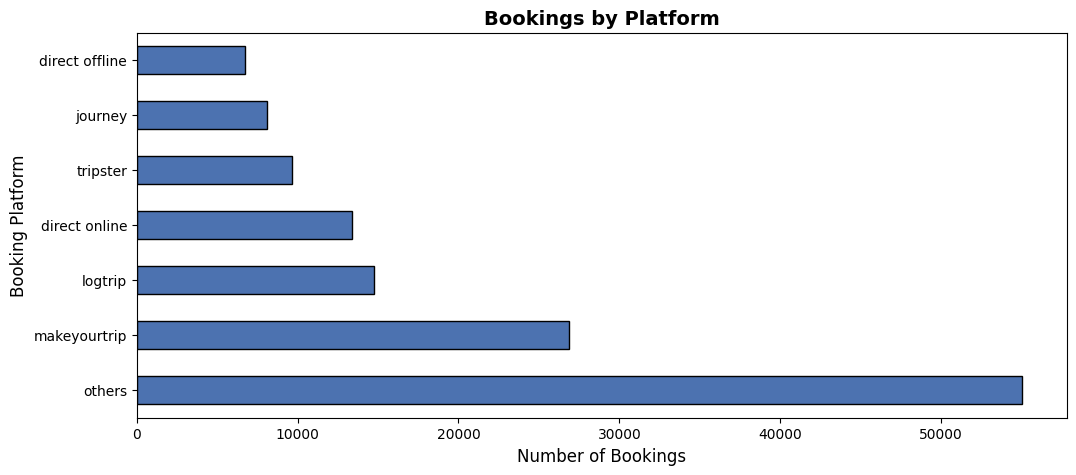

In [8]:
# Import matplotlib for plotting

import matplotlib.pyplot as plt

# Display a horizontal bar chart of booking platform counts

df_bookings.booking_platform.value_counts().plot(
    kind="barh",
    color="#4C72B0",        
    edgecolor="black",      
    figsize=(12, 5)          
)

# Add title and axis labels

plt.title("Bookings by Platform", fontsize=14, fontweight="bold")
plt.xlabel("Number of Bookings", fontsize=12)
plt.ylabel("Booking Platform", fontsize=12)

# Display the chart

plt.show()

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
# Display the minimum and maximum revenue generated values

print(df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max())

6500 28560000


**Read rest of the files in a dataframe**

In [11]:
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")

**Explore hotels data**

In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [14]:
# Count the number of hotels in each category

df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [15]:
# Count the number of hotels in each city and sort the counts in ascending order

df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

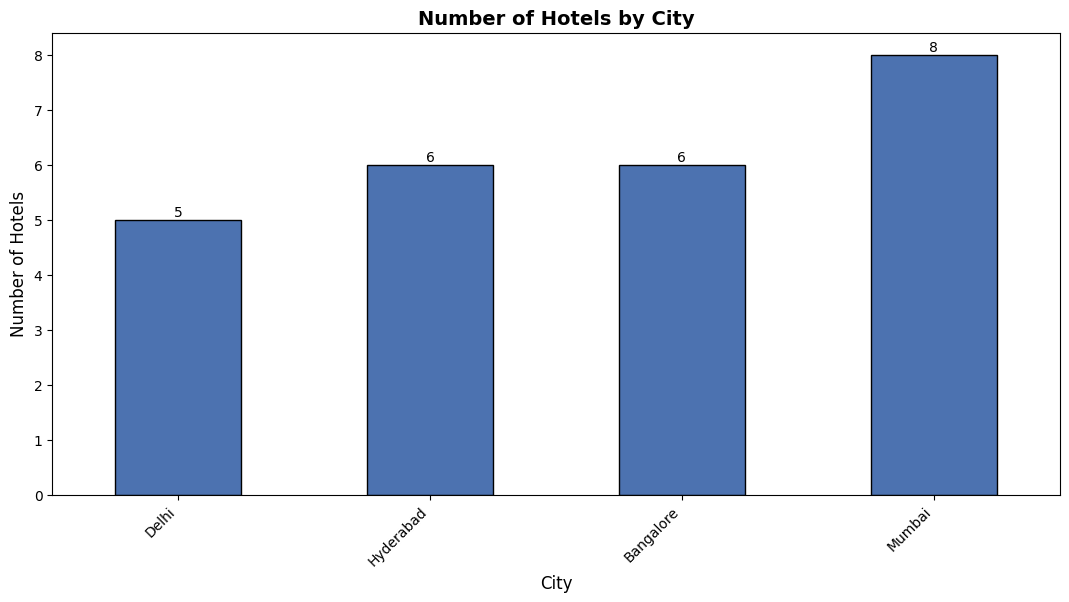

In [16]:
# Plot a bar chart of hotel counts by city

ax = df_hotels.city.value_counts().sort_values().plot(
    kind="bar",
    color="#4C72B0",        
    edgecolor="black",      
    figsize=(13, 6)          
)

# Add title and axis labels

plt.title("Number of Hotels by City", fontsize=14, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Hotels", fontsize=12)

# Rotate x-axis labels for readability

plt.xticks(rotation=45, ha="right")

# Add data labels

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),          # label text
        (p.get_x() + p.get_width() / 2,    # x-position
         p.get_height()),                  # y-position
        ha='center', va='bottom', fontsize=10
    )

# Display the chart

plt.show()

**Explore aggregated bookings data**

In [17]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [18]:
# Retrieve the unique property IDs from the aggregated bookings dataset

df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [19]:
# Calculate the total number of successful bookings for each property

df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [20]:
# Display all records where successful bookings exceeded the available capacity

df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [21]:
# Display the maximum capacity value

print(df_agg_bookings.capacity.max())

50.0


In [22]:
# Display all records where the capacity is equal to the maximum capacity

df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


### 2. Data Cleaning

In [23]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Clean invalid guests**

In [24]:
# Display all bookings where the number of guests is zero or negative

df_bookings[df_bookings.no_guests <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


Records where no_guests is less than or equal to zero indicate invalid data entries, as the number of guests cannot be negative or zero. These records will be excluded from the analysis.

In [25]:
# Remove bookings with zero or negative guests and update the dataset

df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings.shape

(134578, 12)

**Outlier analysis and removal in revenue columns**

In [26]:
# Display the minimum and maximum revenue generated values

print(df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max())

6500 28560000


In [27]:
# Calculate and display the average and standard deviation of revenue generated

avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
print(avg, std)

15378.036937686695 93040.1549314641


In [28]:
# Calculate and display the upper limit for detecting outliers (3 standard deviations above the mean)

higher_limit = avg + 3 * std
print(higher_limit)

294498.50173207896


In [29]:
# Calculate and display the lower limit for detecting outliers (3 standard deviations below the mean)

lower_limit = avg - 3 * std
print(lower_limit)

-263742.4278567056


In [30]:
# Display all bookings where revenue generated is zero or negative

df_bookings[df_bookings.revenue_generated <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [31]:
# Display all bookings where revenue generated exceeds the calculated upper outlier limit

df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [32]:
# Remove bookings with revenue exceeding the upper outlier limit and display the dataset's new shape

df_bookings = df_bookings[df_bookings.revenue_generated <= higher_limit]
df_bookings.shape

(134573, 12)

In [33]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [34]:
# Calculate and display the upper limit for revenue realized (3 standard deviations above the mean)

higher_limit = df_bookings.revenue_realized.mean() + 3 * df_bookings.revenue_realized.std()
print(higher_limit)

33479.358661845814


In [35]:
# Display all bookings where revenue realized exceeds the calculated upper outlier limit

df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


The above dataframe shows that all rooms are of type RT4 (Presidential Suite). Since RT4 represents a luxury room category with higher rental rates, the analysis will be limited to this room type to ensure fair analysis.

In [36]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [37]:
# Display descriptive statistics for revenue realized in bookings with room category 'RT4'

df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [38]:
# mean + 3 * std

23439 + 3 * 9048

50583

Here, the upper limit for revenue_realized in the RT4 room category is 50,583, and the maximum value for revenue_realized in the above dataframe is 45,220. Hence, we can conclude that there are no outliers, and no data cleaning is required for this column.

**Handle null values**

In [39]:
# Count the number of missing values in each column of the bookings dataset

df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

The dataframe contains a total of 134,573 records, out of which 77,897 have a null value for rating_given. Since a large portion of the data is missing this field, these records will not be filtered out. Additionally, the missing ratings will not be replaced with measures such as the mean or median, as this could introduce bias into the analysis.

In [40]:
# Count the number of missing values in each column of the aggregated bookings dataset

df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [41]:
# Display all records where the capacity value is missing

df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [42]:
# Display the median capacity value

print(df_agg_bookings.capacity.median())

25.0


In [43]:
# Fill missing capacity values with the median capacity and update the dataset in place

df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace = True)

C:\Users\Muhammad Bilal Ayub\AppData\Local\Temp\ipykernel_12484\3760441233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace = True)


In [44]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


**Remove records with bookings exceeding capcity**

In [45]:
# Display records where successful bookings exceed the available capacity

df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [46]:
df_agg_bookings.shape

(9200, 5)

In [47]:
# Remove records where successful bookings exceed capacity and display the dataset's new shape

df_agg_bookings = df_agg_bookings[df_agg_bookings["successful_bookings"] <= df_agg_bookings["capacity"]]
df_agg_bookings.shape

(9194, 5)

### 3. Data Transformation

**Create occupancy percentage column**

In [48]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [49]:
# Calculate occupancy percentage for each record

df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"] / df_agg_bookings["capacity"]
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [50]:
# Convert occupancy ratio to percentage and round to 2 decimals

df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x: round(x*100, 2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


### 4. Insights Generation

**Average Occupancy Rate by Room Category**

In [51]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [52]:
# Calculate the average occupancy percentage for each room category

df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

The dataset contains room_category codes such as RT1, RT2, etc., which are not immediately clear. To improve interpretability, I will map these codes to their descriptive room_class—Standard, Premium, Elite, etc.—and calculate the average occupancy percentage for each category.

In [53]:
# Merge aggregated bookings with room details on room category & room_id and display the first few rows

df = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category", right_on = "room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [54]:
# Remove the redundant 'room_id' column after merge and display the first few rows

df.drop("room_id", axis = 1, inplace = True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [55]:
# Calculate the average occupancy percentage grouped by room class

df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

##### Insight & Recommendation

Presidential rooms lead with a 59.28% occupancy rate, indicating strong demand; leverage this by maintaining premium service standards while running targeted promotions to raise occupancy in other categories.

**Average Occupancy Rate per City**

In [56]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [57]:
# Merge the existing DataFrame with hotel details on 'property_id' and display the first few rows

df = pd.merge(df, df_hotels, on = "property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai


In [58]:
# Calculate the average occupancy percentage grouped by city

df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

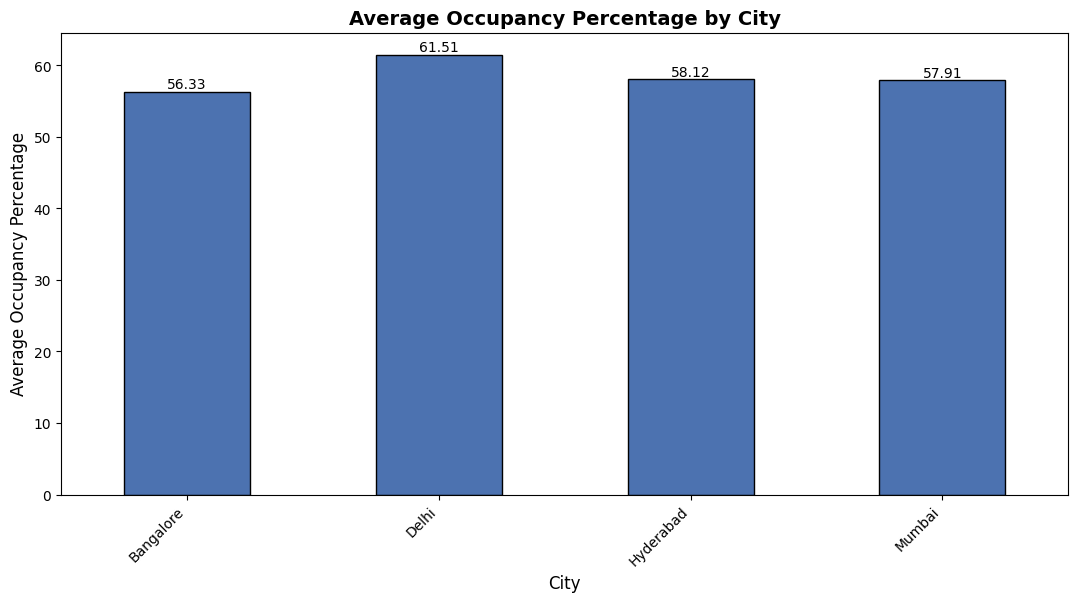

In [59]:
# Plot a bar chart of average occupancy percentage by city

ax = df.groupby("city")["occ_pct"].mean().plot(
    kind="bar",
    color="#4C72B0",
    edgecolor="black",
    figsize=(13, 6)
)

# Add title and axis labels

plt.title("Average Occupancy Percentage by City", fontsize=14, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Occupancy Percentage", fontsize=12)

# Rotate x-axis labels for readability

plt.xticks(rotation=45, ha="right")

# Add data labels

for p in ax.patches:
    ax.annotate(
        str(round(p.get_height(), 2)),          # label text
        (p.get_x() + p.get_width() / 2,    # x-position
         p.get_height()),                  # y-position
        ha='center', va='bottom', fontsize=10
)

# Display the chart

plt.show()


##### Insight & Recommendation

Delhi has the highest occupancy rate (61.51%), indicating strong demand, while Bangalore lags behind at 56.33%. Maintain service excellence in Delhi and Hyderabad, and consider targeted promotions, partnerships, or seasonal discounts in Bangalore and Mumbai to improve occupancy levels.


**Comparison of Occupancy Rates: Weekdays vs. Weekends**

In [60]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [61]:
# Merge the current DataFrame with date details on check-in date & date and display the first few rows

df = pd.merge(df, df_date, left_on = "check_in_date", right_on = "date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [62]:
# Calculate and round the average occupancy percentage by day type

df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

##### Insight & Recommendation

Weekend occupancy (72.34%) is significantly higher than weekday occupancy (50.88%), likely because people are more inclined to travel or take short tours during weekends, making them more likely to stay in hotels. To balance demand, mid-week promotions, partnerships with local attractions, or targeted corporate packages could help attract weekday guests.

**Occupancy Rates by City for the Month of June**

In [63]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [64]:
df_june_22 = df[df["mmm yy"] == "Jun 22"]
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [65]:
df_june_22.groupby("city")["occ_pct"].mean().sort_values(ascending = False)

city
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Bangalore    56.436143
Name: occ_pct, dtype: float64

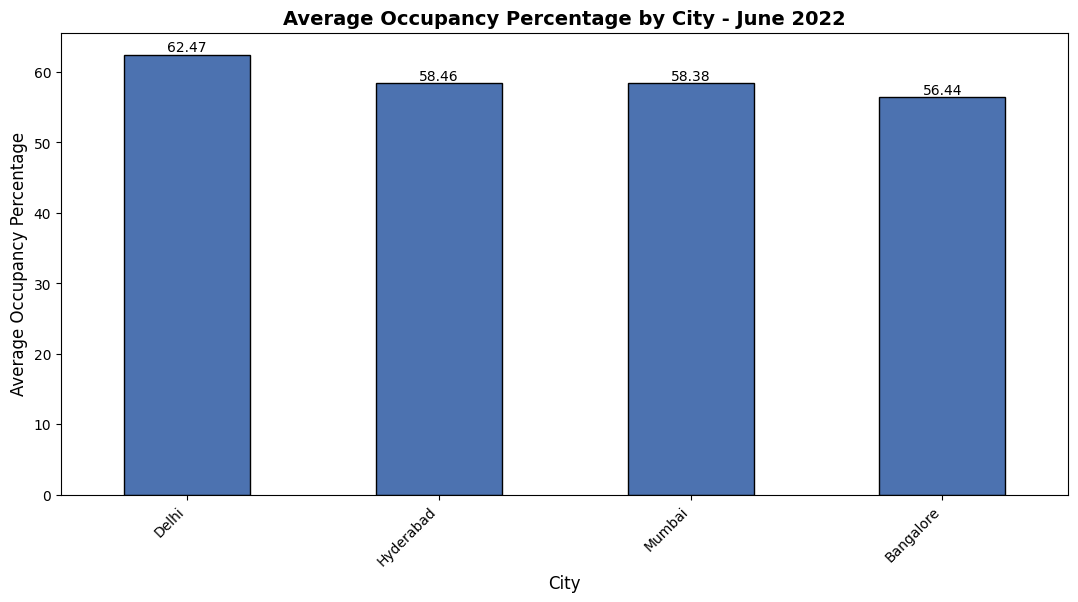

In [66]:
# Plot bar chart of average occupancy percentage by city for June 2022

ax = df_june_22.groupby("city")["occ_pct"].mean().sort_values(ascending=False).plot(
    kind="bar",
    color="#4C72B0",
    edgecolor="black",
    figsize=(13, 6)
)

# Add title and axis labels

plt.title("Average Occupancy Percentage by City - June 2022", fontsize=14, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Occupancy Percentage", fontsize=12)

# Rotate x-axis labels for readability

plt.xticks(rotation=45, ha="right")

# Add data labels

for p in ax.patches:
    ax.annotate(
        str(round(p.get_height(), 2)),          # label text
        (p.get_x() + p.get_width() / 2,    # x-position
         p.get_height()),                  # y-position
        ha='center', va='bottom', fontsize=10
)

# Display the chart

plt.show()

##### Insight & Recommendation

Delhi leads with an occupancy rate of 62.47%, followed by Hyderabad (58.46%), Mumbai (58.38%), and Bangalore (56.44%). The higher occupancy in Delhi may be due to stronger business travel demand or seasonal tourism during this month. Cities with lower rates, like Bangalore, could benefit from targeted marketing campaigns, local event collaborations, or off-season packages to boost hotel stays.

We received new booking data for the month of August. To keep our analysis up to date, this new data will be appended to the existing dataset.

In [67]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [68]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [69]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [70]:
df_august.shape

(7, 13)

In [71]:
df.shape

(6497, 14)

In [72]:
# Combine existing data with new August data, resetting the index, and display the last 10 rows

latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [73]:
latest_df.shape

(6504, 15)

**Revenue Realized by City**

In [74]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [75]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [76]:
# Merge bookings data with hotel details on 'property_id' and display the first few rows

df_bookings_all = pd.merge(df_bookings, df_hotels, on = "property_id")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [77]:
# Calculate the total revenue realized grouped by city

df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

##### Insight & Recommendation

Mumbai led with ₹668.57 M in total revenue, far surpassing Bangalore (₹420.38 M), Hyderabad (₹325.18 M), and Delhi (₹294.40 M). This dominance may stem from higher average room rates, steady corporate travel, and robust tourism. For other cities, seasonal demand fluctuations or competitive pricing may be limiting revenue — suggesting an opportunity to adjust pricing strategies or target high-value market segments.

**Month-by-Month Revenue**

In [78]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [79]:
# Retrieve unique month-year values from the date dataset

df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [80]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [81]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [82]:
# Convert the 'date' column to datetime format and display the first few rows

df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head()

C:\Users\Muhammad Bilal Ayub\AppData\Local\Temp\ipykernel_12484\1014639065.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [83]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [84]:
# Convert 'check_in_date' to datetime format and display the first few rows

df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], format="mixed")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [85]:
# Merge bookings data with date details on check-in date & date and display the first few rows

df_bookings_all = pd.merge(df_bookings_all, df_date, left_on = "check_in_date", right_on = "date")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [86]:
# Calculate total revenue realized grouped by month-year

df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

##### Insight & Recommendation

Revenue peaked in May 2022 at ₹408.38 M, dipped in June 2022 to ₹377.19 M, and then rose again in July 2022 to ₹389.94 M. These shifts may reflect seasonal travel trends, local events, or corporate booking cycles. Tracking such trends over time can help allocate marketing efforts and promotional offers during lower-revenue months to stabilize income.

**Revenue Realized by Hotel Type**

In [87]:
# Calculate total revenue realized by property and sort in ascending order

df_bookings_all.groupby("property_name")["revenue_realized"].sum().sort_values()

property_name
Atliq Seasons     45920757
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179416721
Atliq City       196555383
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

##### Insight & Recommendation

Atliq Exotica topped revenue generation at ₹219.08 M, followed closely by Atliq Palace (₹209.47 M) and Atliq City (₹196.56 M). These premium properties likely command higher room rates and attract steady high-end clientele. In contrast, properties such as Atliq Seasons (₹45.92 M) and Atliq Grands (₹145.86 M) trail behind — suggesting potential to boost occupancy through targeted marketing, upselling premium services, or optimizing pricing strategies.

**Average Rating by City**

In [88]:
# Calculate the average ratings given by city, round to 2 decimals, and sort in ascending order

df_bookings_all.groupby("city")["ratings_given"].mean().round(2).sort_values()

city
Bangalore    3.40
Mumbai       3.64
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

##### Insight & Recommendation

Delhi leads with an average guest rating of 3.78, indicating relatively higher customer satisfaction compared to other cities. Hyderabad (3.66) and Mumbai (3.64) follow closely, while Bangalore lags at 3.40, pointing to possible service or facility improvement opportunities. Addressing guest feedback in underperforming cities could help elevate brand perception and retention.

**Revenue Realized by Booking Plarform**

In [89]:
# Aggregate revenue by booking platform

revenue_by_platform = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()
revenue_by_platform

booking_platform
direct offline     59298844
direct online     117245053
journey            71231599
logtrip           129036321
makeyourtrip      233132708
others            480698244
tripster           84865013
Name: revenue_realized, dtype: int64

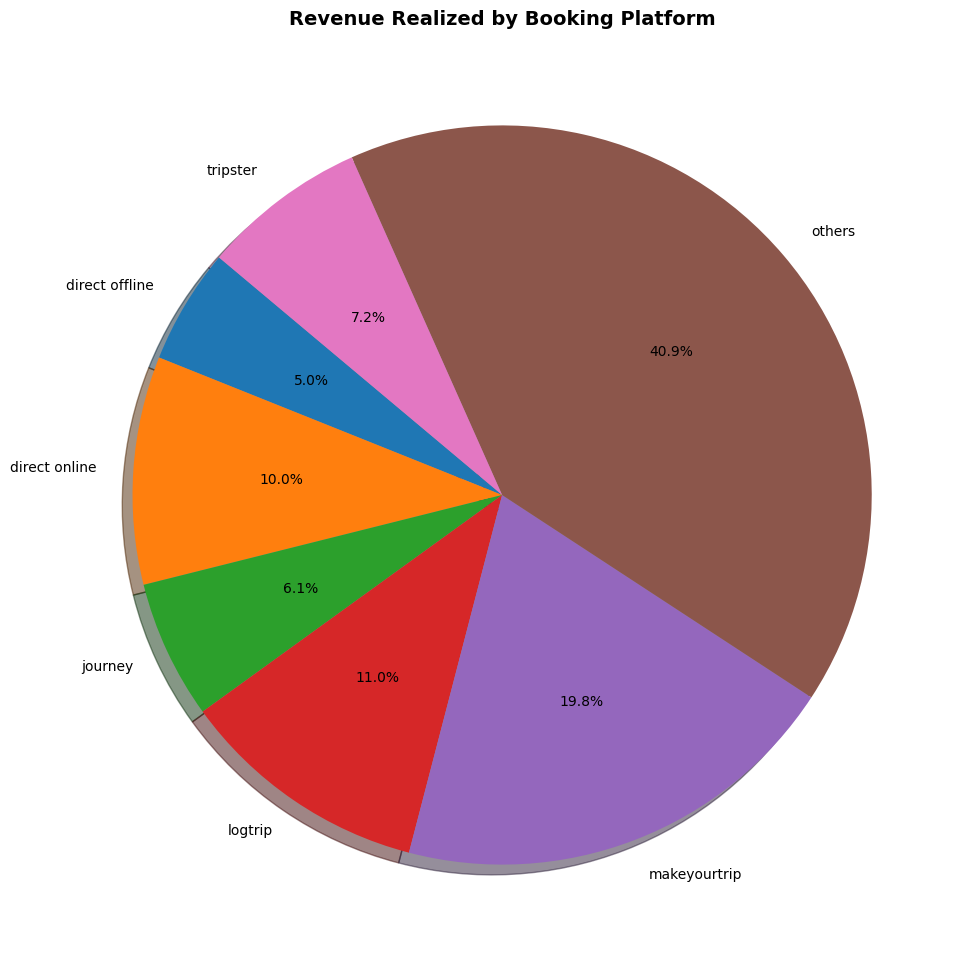

In [90]:
# Plot pie chart

revenue_by_platform.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    figsize=(12, 12),
    legend=False,
)

plt.title("Revenue Realized by Booking Platform", fontsize=14, fontweight='bold')
plt.ylabel('')  # Hide y-label as it's not necessary for pie charts
plt.show()

##### Insight & Recommendation

The highest revenue share comes from "others" (₹480.7M), suggesting either a mix of niche or corporate channels contributing significantly. Among identified platforms, Makeyourtrip leads at ₹233.1M, followed by Logtrip (₹129.0M) and Direct Online (₹117.2M). In contrast, Direct Offline bookings generate just ₹59.3M, highlighting potential to boost direct in-person sales or redirect resources to stronger online channels.